# CodeAlpha Data Visualization task 3
-sanketshakya23@gmail.com

In [2]:
from google.colab import files
uploaded = files.upload()

file = list(uploaded.keys())[0]
print("Uploaded:", file)

df = pd.read_csv(file, low_memory=False)
df.head()


Saving SpotifyFeatures.csv to SpotifyFeatures.csv
Uploaded: SpotifyFeatures.csv


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,0
genre,0
artist_name,0
track_name,1
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


## 🎵  Top 10 Most Popular Artists (Bar Chart)

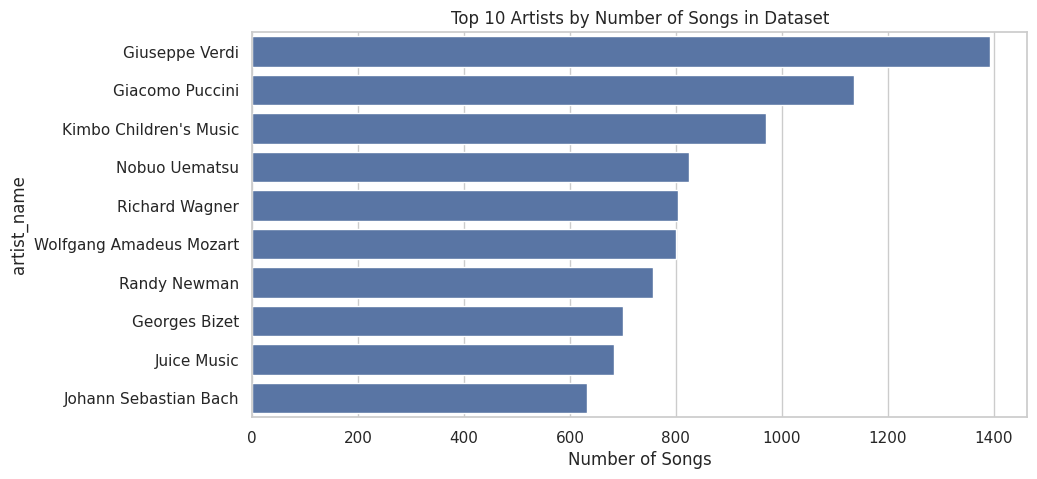

In [5]:
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists by Number of Songs in Dataset")
plt.xlabel("Number of Songs")
plt.show()

## 🎵  Popularity Distribution (Histogram)

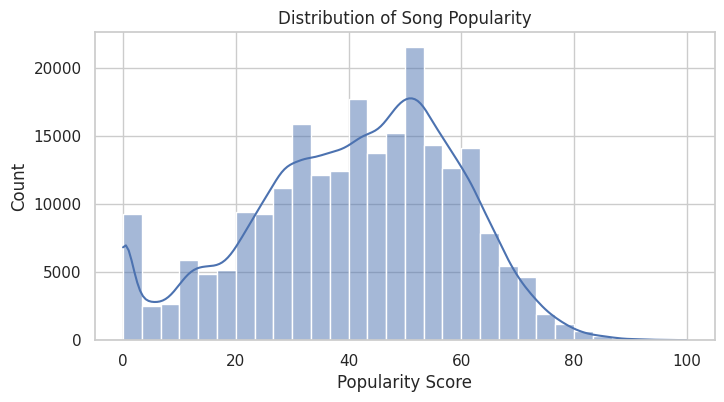

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.show()


# Which artists appear most frequently in the dataset?

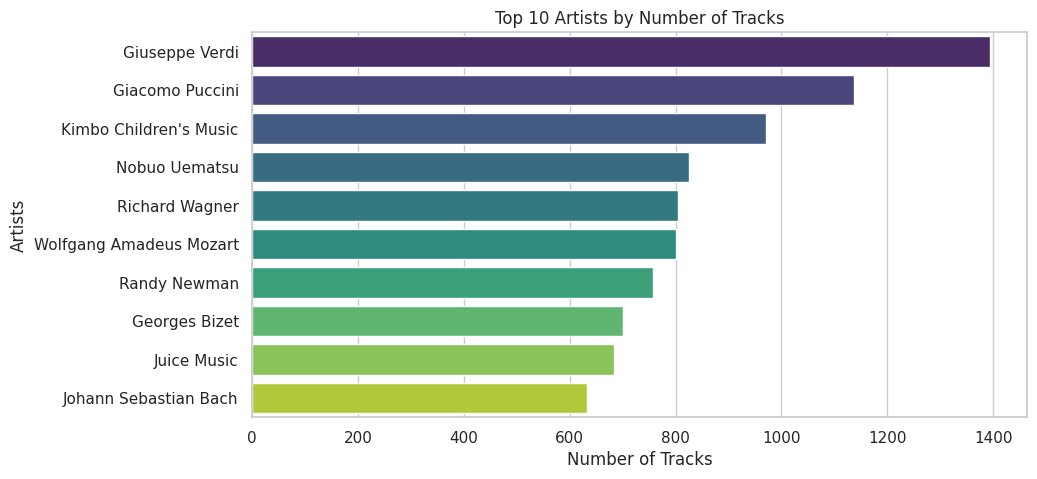

In [15]:
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', hue=top_artists.index, legend=False)
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artists")
plt.show()

# Is there a relationship between a song’s energy and its loudness?

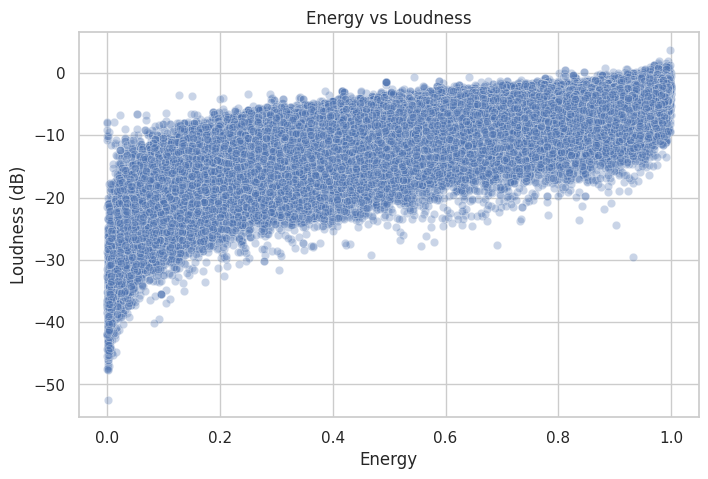

,energy,loudness
energy,1.000000,0.816088
loudness,0.816088,1.000000


In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='energy', y='loudness', data=df, alpha=0.3)
plt.title("Energy vs Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness (dB)")
plt.show()

df[['energy','loudness']].corr()


# Do more danceable songs tend to be more popular?

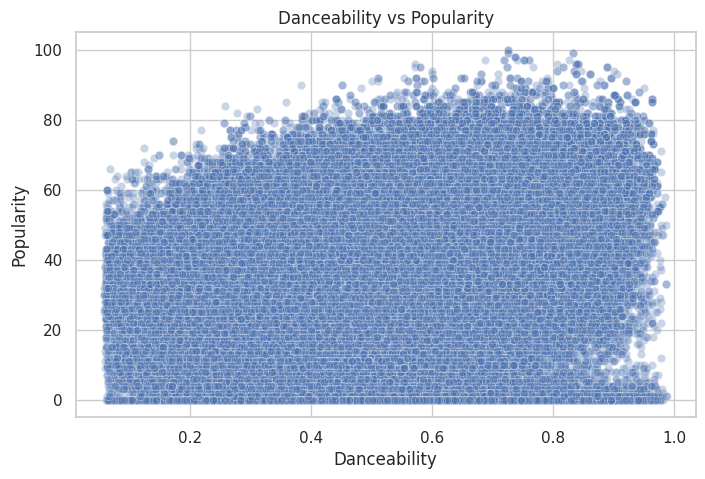

,danceability,popularity
danceability,1.000000,0.256564
popularity,0.256564,1.000000


In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.3)
plt.title("Danceability vs Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

df[['danceability','popularity']].corr()


# Do high-tempo songs tend to be more popular?

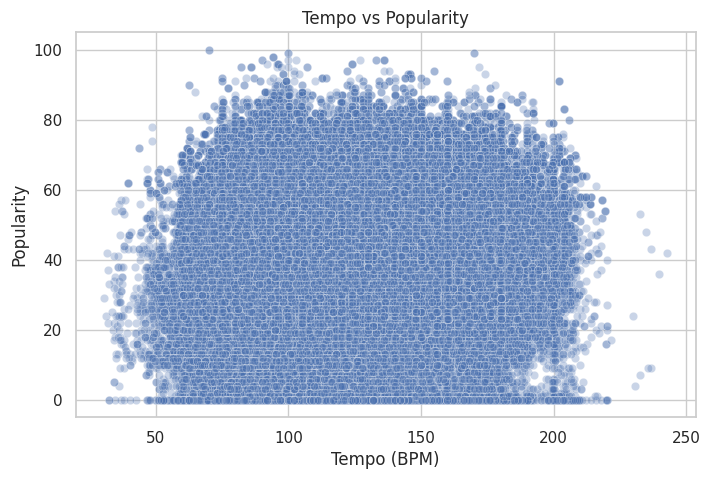

,tempo,popularity
tempo,1.000000,0.081039
popularity,0.081039,1.000000


In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='tempo', y='popularity', data=df, alpha=0.3)
plt.title("Tempo vs Popularity")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.show()

df[['tempo','popularity']].corr()


# What are the characteristics of highly popular songs?

In [17]:
top_songs = df[df['popularity'] > 80]

top_songs[['danceability','energy','valence']].describe()


,danceability,energy,valence
count,989.000000,989.000000,989.000000
mean,0.700228,0.649879,0.487339
std,0.126648,0.158327,0.215904
min,0.258000,0.173000,0.039000
25%,0.614000,0.538000,0.326000
50%,0.704000,0.665000,0.475000
75%,0.788000,0.773000,0.639000
max,0.964000,0.953000,0.969000


# Correlation Heatmap

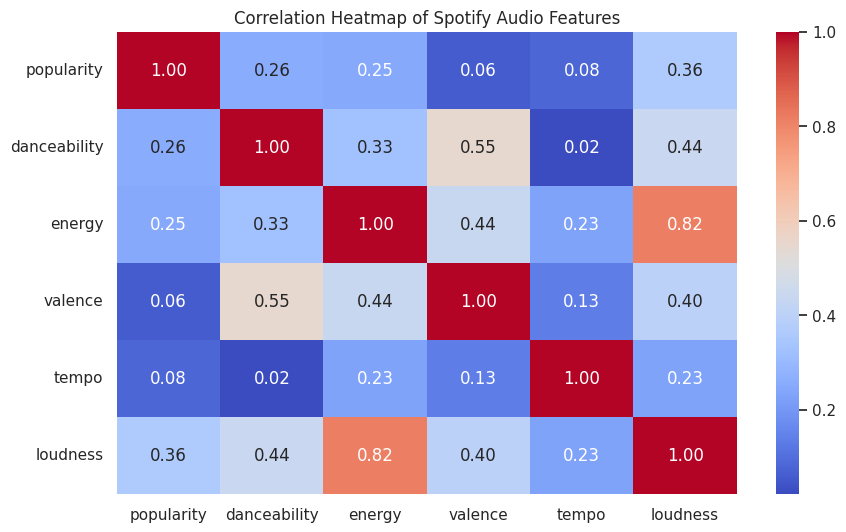

In [18]:
features = ['popularity','danceability','energy','valence','tempo','loudness']

plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Spotify Audio Features")
plt.show()
